# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display  import HTML
from IPython.display       import Image

# Functions

In [2]:
def personal_settings():
     # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

    # seaborn settings
    sns.set(rc={'figure.figsize':(15,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [3]:
personal_settings()

# Loading Data

In [4]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


## Eploratory Analysis 

In [5]:
#check types of variable
data.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#check dataset size
print('Number of rows: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

Number of rows: 21613
Number of columns: 21


In [7]:
#check null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#check NaN values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#check duplicates
data[data.duplicated(['id'],keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000,3,1.50,1580,5000,1.00,0,0,...,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
94,6021501535,20141223T000000,700000,3,1.50,1580,5000,1.00,0,0,...,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
313,4139480200,20140618T000000,1384000,4,3.25,4290,12103,1.00,0,3,...,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
314,4139480200,20141209T000000,1400000,4,3.25,4290,12103,1.00,0,3,...,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
324,7520000520,20140905T000000,232000,2,1.00,1240,12092,1.00,0,0,...,6,960,280,1922,1984,98146,47.50,-122.35,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000,4,2.50,2680,5539,2.00,0,0,...,8,2680,0,2013,0,98045,47.48,-121.73,2680,5992
20779,6300000226,20140626T000000,240000,4,1.00,1200,2171,1.50,0,0,...,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598
20780,6300000226,20150504T000000,380000,4,1.00,1200,2171,1.50,0,0,...,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598
21580,7853420110,20141003T000000,594866,3,3.00,2780,6000,2.00,0,0,...,9,2780,0,2013,0,98065,47.52,-121.89,2850,6000


In [10]:
#separate numerical attributes
df_attributes = data.select_dtypes(include = ['int64', 'float64'])
#check numerical attributes statistical behaviour
avg = pd.DataFrame(df_attributes.apply(np.mean))
median = pd.DataFrame(df_attributes.apply(np.median))
max_= pd.DataFrame(df_attributes.apply(np.max))
min_= pd.DataFrame(df_attributes.apply(np.min))
std = pd.DataFrame(df_attributes.apply(np.std))

df_stats = pd.concat([avg, median, max_, min_, std], axis = 1).reset_index()
df_stats.columns = ['attributes','mean', 'median', 'max_value', 'min_value', 'std']
df_stats

,attributes,mean,median,max_value,min_value,std
0,id,4580301520.86,3904930410.00,9900000190.00,1000102.00,2876499023.43
1,price,540088.14,450000.00,7700000.00,75000.00,367118.70
2,bedrooms,3.37,3.00,33.00,0.00,0.93
3,bathrooms,2.11,2.25,8.00,0.00,0.77
4,sqft_living,2079.90,1910.00,13540.00,290.00,918.42
5,sqft_lot,15106.97,7618.00,1651359.00,520.00,41419.55
6,floors,1.49,1.50,3.50,1.00,0.54
7,waterfront,0.01,0.00,1.00,0.00,0.09
8,view,0.23,0.00,4.00,0.00,0.77
9,condition,3.41,3.00,5.00,1.00,0.65


In [11]:
#From df_stats, noticed large diffence (possible error)
print(data.groupby(['bedrooms']).size())

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64


In [12]:
#check mean living area per number of bedrooms
print(data[['sqft_living', 'bedrooms']].groupby(['bedrooms']).mean().reset_index().sort_values(by = 'sqft_living'))
#houses listed with 33 and 11 rooms considered to be typing error. houses with 0 bedrooms considered to be not attractive. Drop those.

    bedrooms  sqft_living
1          1       884.61
2          2      1239.75
12        33      1620.00
0          0      1707.85
3          3      1805.84
4          4      2554.65
11        11      3000.00
5          5      3047.55
6          6      3284.34
10        10      3706.67
9          9      3775.00
8          8      3800.00
7          7      3974.21


# Transform Data 

In [13]:
#trasform column 'date' to date format
data['date'] = pd.to_datetime(data['date'])
data.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [14]:
#Remove duplicates based on 'id'
data.drop_duplicates(subset="id", keep='first', inplace=True)
print('Number of rows after remove duplicates: {}'.format(data.shape[0]))

Number of rows after remove duplicates: 21436


In [17]:
#Remove outliers
data = data[(data['bedrooms'] != 0) & (data['bedrooms'] != 11) & (data['bedrooms'] != 33)]
print(data.groupby(['bedrooms']).size())

bedrooms
1      194
2     2736
3     9731
4     6849
5     1586
6      265
7       38
8       13
9        6
10       3
dtype: int64


In [20]:
#check data after data cleaning
df_attributes = data.select_dtypes(include = ['int64', 'float64'])
#check numerical attributes statistical behaviour
avg = pd.DataFrame(df_attributes.apply(np.mean))
median = pd.DataFrame(df_attributes.apply(np.median))
max_= pd.DataFrame(df_attributes.apply(np.max))
min_= pd.DataFrame(df_attributes.apply(np.min))
std = pd.DataFrame(df_attributes.apply(np.std))

df_stats = pd.concat([avg, median, max_, min_, std], axis = 1).reset_index()
df_stats.columns = ['attributes','mean', 'median', 'max_value', 'min_value', 'std']
df_stats

,attributes,mean,median,max_value,min_value,std
0,id,4580966503.68,3904921250.00,9900000190.00,1000102.00,2876701014.41
1,price,540605.12,450000.00,7700000.00,75000.00,367696.61
2,bedrooms,3.37,3.00,10.00,1.00,0.90
3,bathrooms,2.12,2.25,8.00,0.00,0.77
4,sqft_living,2082.91,1920.00,13540.00,370.00,918.89
5,sqft_lot,15131.07,7615.00,1651359.00,520.00,41529.29
6,floors,1.50,1.50,3.50,1.00,0.54
7,waterfront,0.01,0.00,1.00,0.00,0.09
8,view,0.24,0.00,4.00,0.00,0.77
9,condition,3.41,3.00,5.00,1.00,0.65


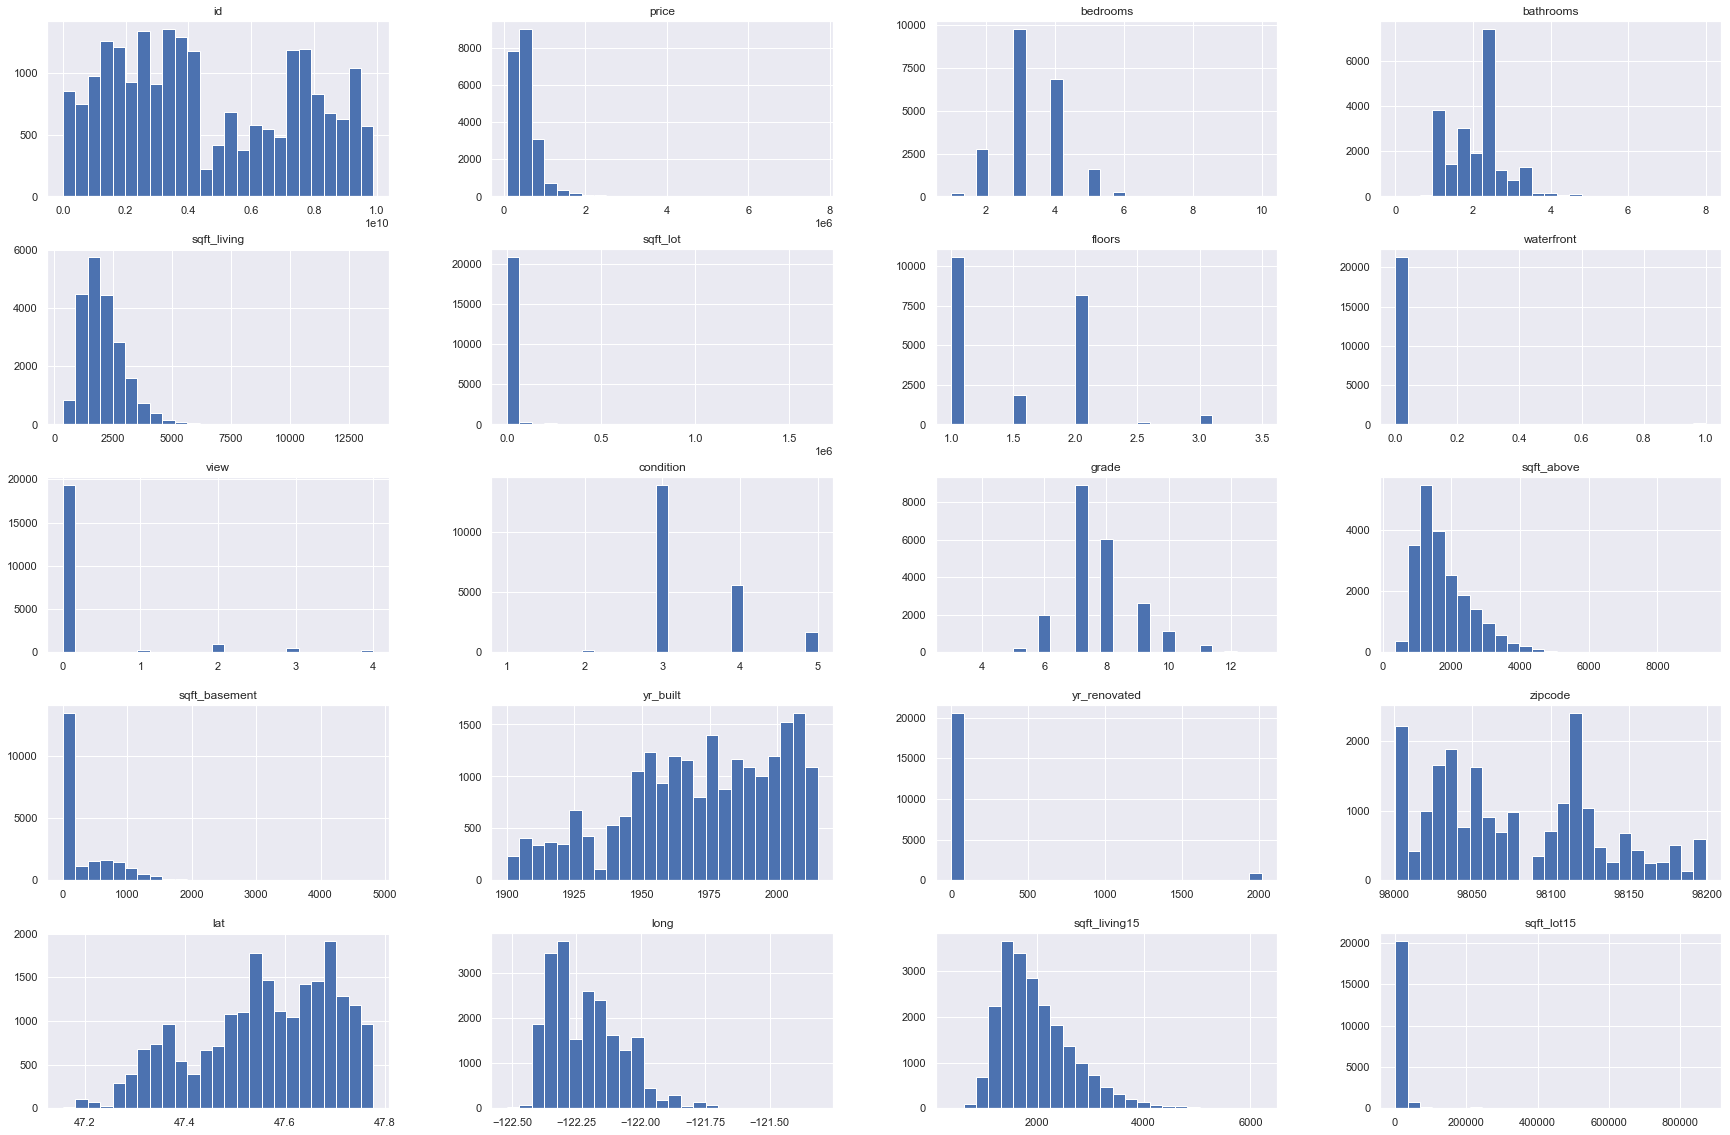

In [22]:
sns.set(rc={'figure.figsize':(30,20)})
df_attributes.hist(bins=25);
personal_settings()